# <center>基于物理信息神经网络的最速降线问题求解</center>

### <center>孙琪, 《应用与计算数学前沿讲座》，2024秋</center>

## 1. 最速降线问题（**Brachistochrone Problem**）

假设点 $A(0,0)$ 和 $B(x^*,y^*)$ 不同在一条与 $y$ 轴平行的直线上，有一质点**受重力作用**从 $A$ 到 $B$ 沿曲线路径自由下滑，**不考虑摩擦阻力**，求**质点下降最快的路径**。

<center><figure>
    <img src="figures//Brachistochrone.gif" width="500">
    <figcaption>从 $A$ 到 $B$ 所需时间最短</figcaption>
</figure></center>

### 变分问题

记 $y = y(x)$ 为从 $A$ 到 $B$ 的任一光滑曲线，其中 $0\leq x\leq x^*$。假设质点从 $A$ 到达曲线上任意一点 $P(x,y)$ 时的速度为 
$$
v=\frac{ds}{dt} = \sqrt{ 1 + ( y'(x) )^2 } \frac{dx}{dt}
$$
其中由弧微分公式知 $(ds)^2=(dx)^2+(dy)^2 = \left( 1 + ( y'(x) )^2 \right) (dx)^2$。根据**能量守恒原理**（失去的势能等于得到的动能）有
$$
\frac{1}{2}m v^2 = m g y ~~\xRightarrow{\text{带入速度表达式}}~~ \sqrt{ 1 + ( y'(x) )^2 } \frac{dx}{dt} = \sqrt{2g y(x)} ~~\xRightarrow{\text{改写}}~~ dt = \sqrt{\frac{1 + ( y'(x) )^2}{2g y(x)}}dx
$$
其中 $m$ 为质点的质量，$g$ 为重力加速度常数。由此可知，从 $A$ 下滑至 $B$ 所需时间可以表达为一个**泛函**
$$
T = J[y] = \int_{0}^{x^*} \sqrt{\frac{1 + ( y'(x) )^2}{2g y(x)}}dx.
$$
其中函数 $y$ 所属的空间为 $Y = \left\{ y \,|\, y\in C^1[0,x^*],\, y(0)=0,\, y(x^*)=y^* \right\}$。

### Euler-Lagrange 方程

> 假设满足边界条件 $y(a)=A$ 和 $y(b)=B$ 的函数 $y(x)$ 使得以下泛函取到极值 
> 
> <center>$\displaystyle J[y] = \int_a^b L(x,y(x),y'(x))dx$</center>
>
> 则 $y(x)$ 满足 [Euler-Lagrange 方程](https://en.wikipedia.org/wiki/Euler%E2%80%93Lagrange_equation)
>
> <center>$\displaystyle \frac{\partial L}{\partial y}(x,y(x),y'(x)) - \frac{d}{dx} \frac{\partial L}{\partial y'}(x,y(x),y'(x)) = 0.$</center>
>
> 特别的，当 $\displaystyle \frac{\partial L}{\partial x} = 0$ 时，存在常数 $C$ 使得下述 [Beltrami 等式](https://mathworld.wolfram.com/BeltramiIdentity.html) 成立
>
> <center>$\displaystyle L - y'(x) \frac{\partial L}{\partial y'}(x,y(x),y'(x)) = C.$</center>


通过 Euler-Lagrange 方程可以解析求解最速降线问题，即 [轮转线](https://mathworld.wolfram.com/BrachistochroneProblem.html)（也称为摆线）
$$
x(\theta)=R(\theta - \sin\theta), ~~~~
y(\theta)=R(1 - \cos\theta),
$$
其中 $\theta=[0,\theta^*]$，$\theta^*$ 和 $R$ 由问题的边界条件确定。

## 2. 物理信息神经网络

#### 函数逼近

得益于人工神经网络的通用逼近性质
- 任意复杂的函数或算子都可以通过一个适当的人工神经网络来表示或逼近
- The Universal Approximation Theorem (1989): Neural Networks are capable of approximating any Borel measurable function
  
<center><img src="figures//universal-approximator.jpg" width="500"></center>

我们使用一个全连接网络（fully-connected neural network）来参数化未知函数，其中神经网络的待定参数用 $\theta$ 表示，即

$$
y(x) \approx y_{\mathrm{NN}}(x;\theta) = \mathrm{NN}(x;\theta).
$$

除了用神经网络直接参数化待求函数，还可以将先验知识融入到待求函数的构造中，例如：

- 将过 $A$ 和 $B$ 的直线做为基准模型，即
$$ 
y(x) \approx y_{\mathrm{NN}}(x;\theta) = \frac{y^* - 0}{x^* - 0}(x - 0) + \mathrm{NN}(x;\theta) = \frac{y^*}{x^*}x + \mathrm{NN}(x;\theta);
$$

- 将边界条件 $y(0)=0$ 和 $y(x^*)=y^*$ 以硬约束 **(hard constraint)** 的方式嵌入到待求函数中，即
$$ 
y(x) \approx y_{\mathrm{NN}}(x;\theta) = \frac{y^*}{x^*}x + \ell(x) \mathrm{NN}(x;\theta);
$$
其中距离函数 $\ell(x)$ 满足 $\ell(0)=\ell(x^*)=0$，例如 $\ell(x) = x (x - x^*)$ 或者 $\ell(x) = \tanh(x) \tanh(x - x^*)$。

#### 损失函数

由于待求函数的构造已满足边界条件（即 $y_{\mathrm{NN}}\in Y$），因此可以直接离散泛函中的积分，通过求解以下优化问题来近似得到模型的最优参数

$$
\mathcal{L}(\theta) = \sum^{N}_{i=0} w_i  \left( \frac{1 + \left( \frac{d }{dx}y_{\mathrm{NN}}(x_i;\theta) \right)^2}{2g y_{\mathrm{NN}}(x_i;\theta)}  \right)^{\frac12}
$$

其中 $\{ w_i, x_i \}_{i=0}^N$ 为数值积分公式中权重与节点所组成的集合。例如，将 $[0, x^*]$ 区间等分为 $N$ 份，用梯形公式 **(Trapezoidal Rule)** 做数值积分得到

$$
\mathcal{L}(\theta) = \sum_{i=0}^{N-1} \frac12 \left( \left( \frac{1 + \left( \frac{d }{dx}y_{\mathrm{NN}}(x_i;\theta) \right)^2}{2g y_{\mathrm{NN}}(x_i;\theta)}  \right)^{\frac12}   +  \left( \frac{1 + \left( \frac{d }{dx}y_{\mathrm{NN}}(x_{i+1};\theta) \right)^2}{2g y_{\mathrm{NN}}(x_{i+1};\theta)}  \right)^{\frac12}\right)  \frac{x^*-0}{N}.
$$


#### 自动微分

自动微分技术 **Auto Differentiation**（[`torch.autograd`](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#a-gentle-introduction-to-torch-autograd)）可以用来精确计算模型解关于输入变量的导数，进而用于构造损失函数。

<center><img src="figures//PINNs-flowchart.jpg" width="500"></center>

## 编程实践

In [1]:
import torch
import torch.nn as nn
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

def cycloid(xT, yT):
    "Return the exact parameters for the Brachistochrone curve (cycloid) from (0,0) to (xT, yT)"
    
    def y(theta):
        return yT/xT - (1-np.cos(theta))/(theta-np.sin(theta))
        
    thetaT = scipy.optimize.newton(y, np.pi/2) # solve for thetaT given (xT, yT)
    R = yT / (1 - np.cos(thetaT))
    
    return thetaT, R

### 准备阶段 - 全连接神经网络

In [2]:
class NN_Ansatz(nn.Module):
    "Defines the ansatz of Brachistochrone curve using a standard fully-connected network"
    "N_INPUT, N_OUTPUT = Dimension of Input, Output"
    "N_HIDDEN = Width of Hidden Layers"
    "N_LAYERS = Number of Hidden Layers"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh

        # starting layer
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])

        # hidden layer
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])

        # ending layer
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x, xT, yT):
        
        # linear model
        # TODO: write model
        
        # residual model
        # TODO: write model
        
        y = y_linear + y_residual
        
        return y

### 训练阶段

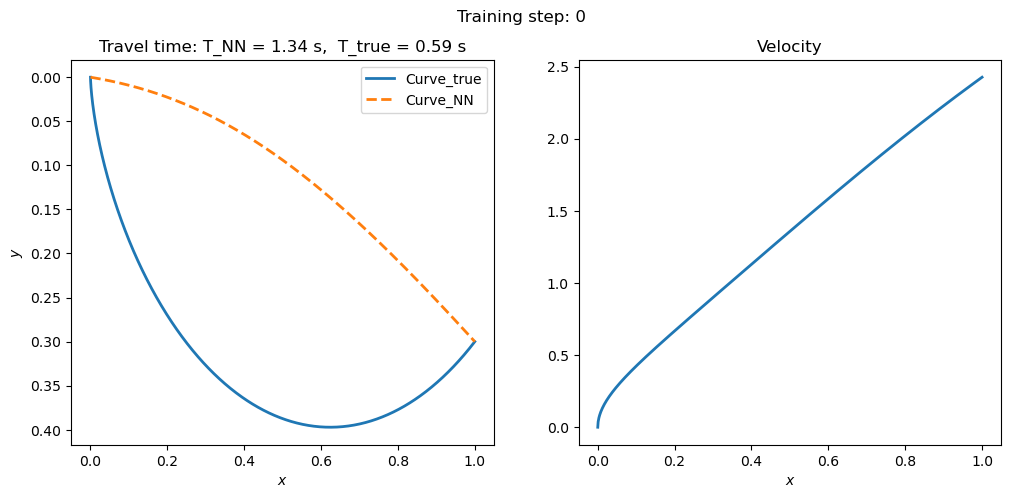

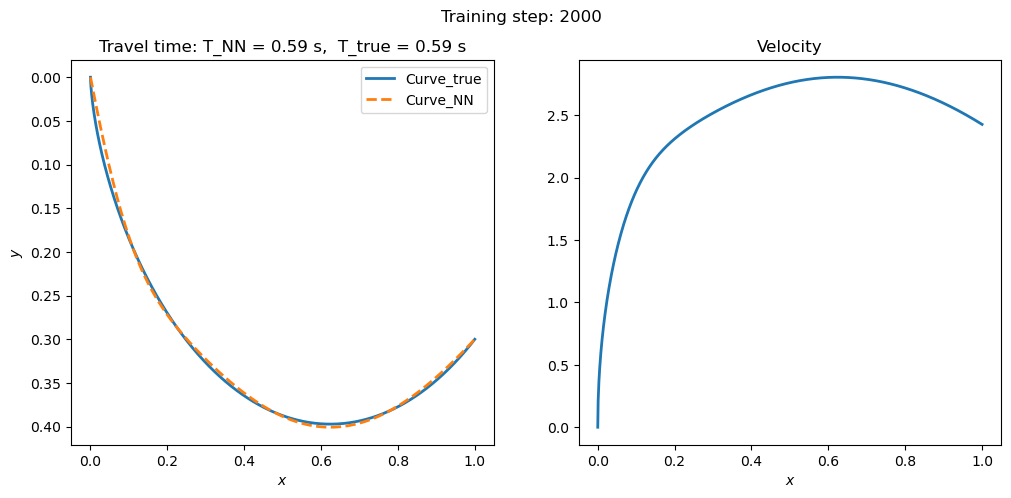

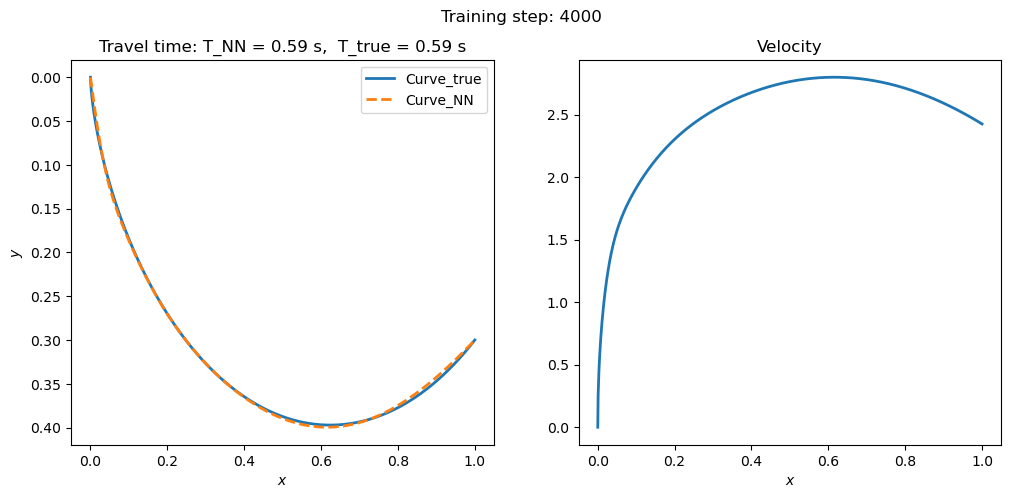

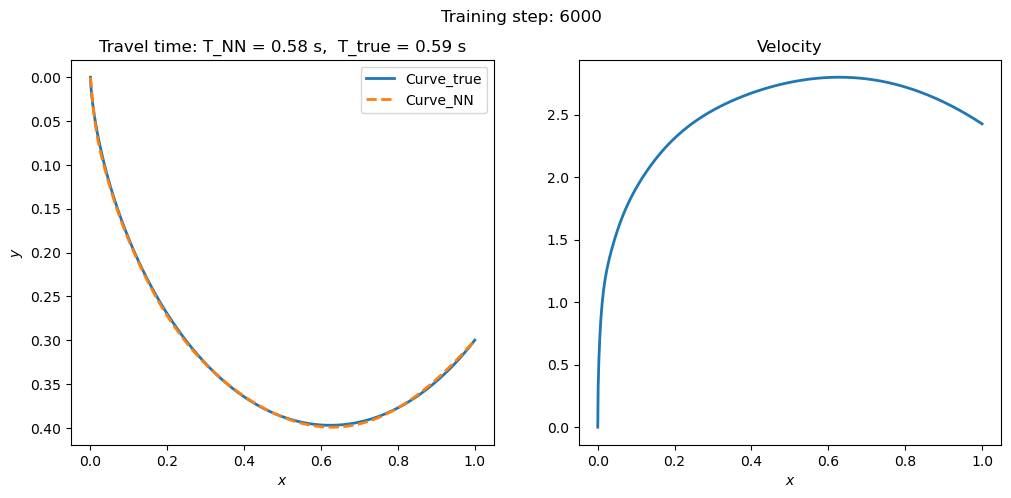

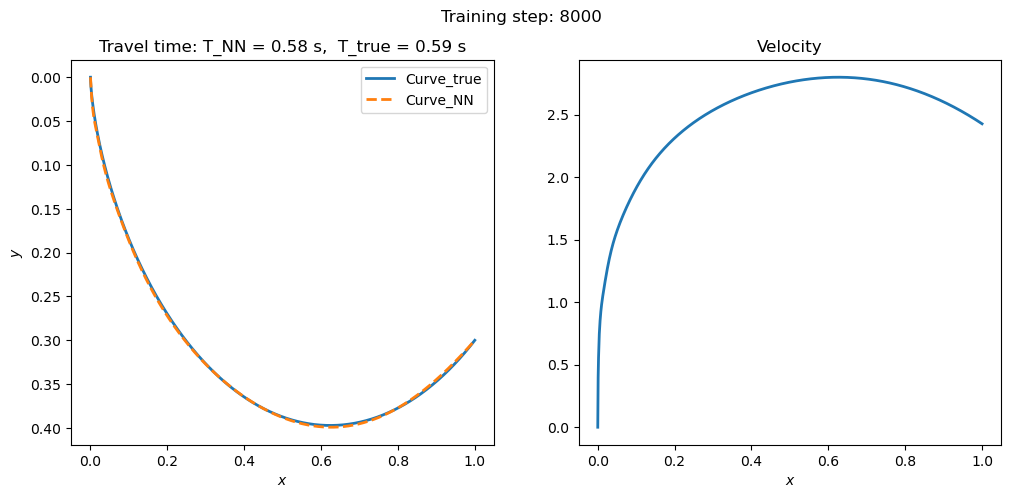

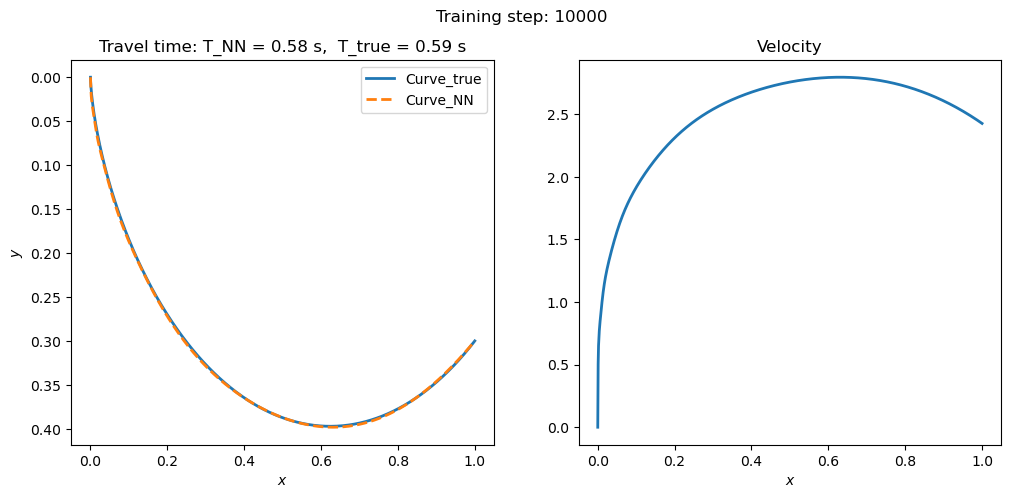

In [3]:
# define the problem
xT, yT = 1, 0.3
g = 9.81

# define our model
torch.manual_seed(0)
model = NN_Ansatz(1, 1, 8, 4)

# define number of step size for numercial integration
n = 10000
dx = (xT - 0) / n
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for it in range(10001):
    optimizer.zero_grad()

    # 1. numerical integration for computing the travel time 
    # generate grid points 
    # TODO: write code
    
    # calculate the integrand 
    # TODO: write code

    # trapezoid rule
    # TODO: write code
    
    # 2. minimise the loss function to find Brachistochrone curve
    T_NN.backward()
    optimizer.step()
            
    # plot the results
    if it % 2000 == 0:
        
        x = torch.linspace(0,1,1000, requires_grad=True).reshape((-1,1))
        y = model(x, xT, yT)
        
        # get exact solution
        thetaT, R = cycloid(xT, yT)
        theta = np.linspace(0, thetaT, 1000)
        x_true = R * (theta - np.sin(theta))
        y_true = R * (1 - np.cos(theta))
        T_true = thetaT * np.sqrt(R / g)

        plt.figure(figsize=(12,5))
        plt.suptitle(f"Training step: {it}")
        
        plt.subplot(1,2,1)
        plt.title(f"Travel time: T_NN = {T_NN.item():.2f} s,  T_true = {T_true:.2f} s")            
        plt.plot(x_true, y_true, linewidth=2, label="Curve_true")
        plt.plot(x.detach()[:,0], y.detach()[:,0], linewidth=2, linestyle='dashed', label="Curve_NN")
        ylim = plt.ylim()
        plt.ylim(ylim[1], ylim[0])
        plt.xlabel("$x$"); plt.ylabel("$y$")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.title("Velocity")
        plt.plot(x.detach()[:,0], torch.sqrt(2*g*y).detach()[:,0], linewidth=2)
        plt.xlabel("$x$")
        plt.show()


## 3. 课后作业（Talk is cheap. Show me the code.）

### 小组作业 1（正问题）
- 采用外推加速技巧（也称为 Romberg 积分法）来计算数值积分，汇报其加速收敛效果对模型训练结果的影响。

### 小组作业 2（正问题）
- 假设质点在滑动过程中还存在摩擦阻力，通过理论分析写出其泛函的表达式，并利用物理信息神经网络方法进行数值求解。
- 参考资料：[Brachistochrone problem with friction](https://mathworld.wolfram.com/BrachistochroneProblem.html)。

### 小组作业 3（正问题）
- 悬链线问题 **（catenary）**：给定一条密度为 $\rho$，长度为 $L$ 的铁链，且其首位两端分别连接两点 $(x_1,y_1)$ 和 $(x_2,y_2)$，请找出铁链的最优形状 $y(x)$ 使得总势能
$$
U = \int_{x_1}^{x_2} \rho g y\,ds = \rho g\int_{x_1}^{x_2} y \sqrt{1+(y')^2}dx
$$
达到最小，其中长度固定的约束条件可以表示为
$$
L = \int_{x_1}^{x_2} ds = \int_{x_1}^{x_2} \sqrt{1+(y')^2}dx.
$$
用机器学习方法求解该问题，并与用 Euler-Lagrange 方程求出的解析结果进行验证。

- 参考资料：[Constrained variational problem](https://web.math.utk.edu/~freire/teaching/m231f08/m231f08brachistochrone.pdf)。